In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
import scipy.stats as stats
import sklearn
import os

In [2]:
# 원본 데이터
data_raw = pd.read_csv('./noin.csv', sep = ',')
# 테스트 데이터
data_raw_test = pd.read_csv('./noin.csv', sep = ',') 

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244171 entries, 0 to 244170
Data columns (total 67 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              244171 non-null  int64  
 1   SEX                    244171 non-null  int64  
 2   AGE                    244171 non-null  int64  
 3   SIDO                   244171 non-null  int64  
 4   IPSN_TYPE_CD           244171 non-null  int64  
 5   CTRB_PT_TYPE_CD        244171 non-null  int64  
 6   DFAB_GRD_CD            244171 non-null  int64  
 7   DFAB_PTN_CD            244171 non-null  int64  
 8   DFAB_REG_YM            1193 non-null    float64
 9   Stroke                 244171 non-null  float64
 10  AF                     244171 non-null  float64
 11  CAD                    244171 non-null  float64
 12  Cancer                 244171 non-null  float64
 13  DM                     244171 non-null  float64
 14  HF                     244171 non-nu

In [4]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244171 entries, 0 to 244170
Data columns (total 67 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              244171 non-null  int64  
 1   SEX                    244171 non-null  int64  
 2   AGE                    244171 non-null  int64  
 3   SIDO                   244171 non-null  int64  
 4   IPSN_TYPE_CD           244171 non-null  int64  
 5   CTRB_PT_TYPE_CD        244171 non-null  int64  
 6   DFAB_GRD_CD            244171 non-null  int64  
 7   DFAB_PTN_CD            244171 non-null  int64  
 8   DFAB_REG_YM            1193 non-null    float64
 9   Stroke                 244171 non-null  float64
 10  AF                     244171 non-null  float64
 11  CAD                    244171 non-null  float64
 12  Cancer                 244171 non-null  float64
 13  DM                     244171 non-null  float64
 14  HF                     244171 non-nu

In [5]:
data_raw_test.isnull().sum()

PERSON_ID            0
SEX                  0
AGE                  0
SIDO                 0
IPSN_TYPE_CD         0
                 ...  
KDSQ_C_1        179799
KDSQ_C_2        179728
KDSQ_C_3        179743
KDSQ_C_4        179745
KDSQ_C_5        179770
Length: 67, dtype: int64

In [6]:
# 통계 자료 연령대로 분류하기
data_raw_test['AGE_GROUP'] = data_raw_test['AGE']
data_raw_test.loc[data_raw_test['AGE'] >= 80, 'AGE_GROUP'] = 80
data_raw_test.loc[(data_raw_test['AGE'] >= 70) & (data_raw_test['AGE'] < 80) , 'AGE_GROUP'] = 70
data_raw_test.loc[(data_raw_test['AGE'] >= 60) & (data_raw_test['AGE'] < 70) , 'AGE_GROUP'] = 60

In [7]:
# HEIGHT, WEIGHT Nan 값 0으로 대체
data_raw_test['HEIGHT'].fillna(0, inplace=True)
data_raw_test['WEIGHT'].fillna(0, inplace=True)

In [8]:
data_raw_test['HEIGHT'].isnull().sum()
data_raw_test['WEIGHT'].isnull().sum()

0

In [9]:
'''
KOSIS 시도별 연령별 성별 평균 신장 분포 현황 통계 자료(남자)

* 출처 - http://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N130

'''

#서울 11
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 163

#부산 26
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 164

#대구 27
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 164

#인천 28
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 163

#광주 29
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 164

#대전 30
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 163

#울산 31
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 164

#세종 36
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 162

#경기 41
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 163

#강원 42
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 166
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 164
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 162

#충북 43
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 166
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 164
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 162

#충남 44
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 164
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 162

#전북 45
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 162

#전남 46
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 163

#경북 47
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 162

#경남 48
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 163

#제주 49
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] == 167
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] == 165
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49 ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] == 163

Series([], Name: HEIGHT, dtype: bool)

In [10]:
'''
KOSIS 시도별 연령별 성별 평균 신장 분포 현황 통계 자료(여자)

* 출처 - http://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N130

'''

#서울
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 155
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

#부산
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 155
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

#대구
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

#인천
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 148

#광주
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 155
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

#대전
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 148

#울산
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 155
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

#세종
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#경기
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 148

#강원
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#충북
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 150
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#충남
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 150
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#전북
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#전남
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 148

#경북
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 147

#경남
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 151
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 148

#제주
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'HEIGHT'] = 154
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'HEIGHT'] = 152
data_raw_test.loc[ (data_raw_test['HEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'HEIGHT'] = 149

In [11]:
'''
시도별 성별 연령별 평균 체중 분포 현황 통계 자료(남자)

* 출처 - http://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N132

'''
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 63

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 63

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 67
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 69
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 61

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 69
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 63

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 69
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 62

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 60

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 60

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 69
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 60

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 69
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 66
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 61

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 60

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 61

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 70
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 67
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 64

In [12]:
'''
시도별 성별 연령별 평균 체중 분포 현황 통계 자료(여자)

* 출처 - http://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N132

'''

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 11  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 54

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 26  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 54

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 27  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 52

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 28  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 53

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 29  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 53

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 30  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 53

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 31  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 52

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 36  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 51

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 41  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 53

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 59
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 42  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 52

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 68
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 65
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 43  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 60

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 44  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 50

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 45  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 50

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 59
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 46  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 50

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 55
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 47  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 50

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 56
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 48  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 50

data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 60), 'WEIGHT'] = 58
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 70), 'WEIGHT'] = 57
data_raw_test.loc[ (data_raw_test['WEIGHT'] == 0) & (data_raw_test['SIDO'] == 49  ) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 80), 'WEIGHT'] = 53

In [13]:
print(data_raw_test['BP_HIGH'].isnull().sum())
print(data_raw_test['BP_LWST'].isnull().sum())

209
209


In [14]:
# 데이터가 충분히 있으므로 BP_HIGH, BP_LWST의 결측값이 있는 행을 지우기로 결정
# print(209/244171*100)
data_raw_test = data_raw_test.dropna(subset=['BP_HIGH', 'BP_LWST'])

In [15]:
data_raw_test.isnull().sum()

PERSON_ID            0
SEX                  0
AGE                  0
SIDO                 0
IPSN_TYPE_CD         0
                 ...  
KDSQ_C_2        179536
KDSQ_C_3        179551
KDSQ_C_4        179553
KDSQ_C_5        179578
AGE_GROUP            0
Length: 68, dtype: int64

In [16]:
# DFAB_REG_YM 컬럼 삭제
data_raw_test.drop('DFAB_REG_YM', axis=1, inplace=True)

In [17]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243960 entries, 0 to 244170
Data columns (total 67 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              243960 non-null  int64  
 1   SEX                    243960 non-null  int64  
 2   AGE                    243960 non-null  int64  
 3   SIDO                   243960 non-null  int64  
 4   IPSN_TYPE_CD           243960 non-null  int64  
 5   CTRB_PT_TYPE_CD        243960 non-null  int64  
 6   DFAB_GRD_CD            243960 non-null  int64  
 7   DFAB_PTN_CD            243960 non-null  int64  
 8   Stroke                 243960 non-null  float64
 9   AF                     243960 non-null  float64
 10  CAD                    243960 non-null  float64
 11  Cancer                 243960 non-null  float64
 12  DM                     243960 non-null  float64
 13  HF                     243960 non-null  float64
 14  HTN                    243960 non-nu

In [18]:
'''
허리둘레 결측값(한국인인체치수조사)
 * 출처 -  https://sizekorea.kr/page/report/8_4
'''
data_raw_test['WAIST'].fillna(0, inplace=True)
data_raw_test.loc[ (data_raw_test['WAIST'] == 0) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] == 50), 'WAIST'] = 87
data_raw_test.loc[ (data_raw_test['WAIST'] == 0) & (data_raw_test['SEX'] == 1) & (data_raw_test['AGE_GROUP'] >= 60), 'WAIST'] = 88

data_raw_test.loc[ (data_raw_test['WAIST'] == 0) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] == 50), 'WAIST'] = 83
data_raw_test.loc[ (data_raw_test['WAIST'] == 0) & (data_raw_test['SEX'] == 2) & (data_raw_test['AGE_GROUP'] >= 60), 'WAIST'] = 86

In [19]:
data_raw_test.isnull().sum()

PERSON_ID            0
SEX                  0
AGE                  0
SIDO                 0
IPSN_TYPE_CD         0
                 ...  
KDSQ_C_2        179536
KDSQ_C_3        179551
KDSQ_C_4        179553
KDSQ_C_5        179578
AGE_GROUP            0
Length: 67, dtype: int64

In [20]:
# 일단 흡연 관련은 Cloumn은 Drop 해보자
data_raw_test.drop('PAST_SMK_TERM_RSPS_CD', axis=1, inplace=True)
data_raw_test.drop('PAST_DSQTY_RSPS_CD', axis=1, inplace=True)
data_raw_test.drop('CUR_SMK_TERM_RSPS_CD', axis=1, inplace=True)
data_raw_test.drop('CUR_DSQTY_RSPS_CD', axis=1, inplace=True)

#인지기능장애 일단 삭제
data_raw_test.drop('KDSQ_C', axis=1, inplace=True)
data_raw_test.drop('KDSQ_C_1', axis=1, inplace=True)
data_raw_test.drop('KDSQ_C_2', axis=1, inplace=True)
data_raw_test.drop('KDSQ_C_3', axis=1, inplace=True)
data_raw_test.drop('KDSQ_C_4', axis=1, inplace=True)
data_raw_test.drop('KDSQ_C_5', axis=1, inplace=True)

In [21]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243960 entries, 0 to 244170
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              243960 non-null  int64  
 1   SEX                    243960 non-null  int64  
 2   AGE                    243960 non-null  int64  
 3   SIDO                   243960 non-null  int64  
 4   IPSN_TYPE_CD           243960 non-null  int64  
 5   CTRB_PT_TYPE_CD        243960 non-null  int64  
 6   DFAB_GRD_CD            243960 non-null  int64  
 7   DFAB_PTN_CD            243960 non-null  int64  
 8   Stroke                 243960 non-null  float64
 9   AF                     243960 non-null  float64
 10  CAD                    243960 non-null  float64
 11  Cancer                 243960 non-null  float64
 12  DM                     243960 non-null  float64
 13  HF                     243960 non-null  float64
 14  HTN                    243960 non-nu

In [22]:
'''
1. 평균값으로 결측값 대체
'''

# 중앙값
print(int(data_raw_test['TRIGLYCERIDE'].mean()))
print(int(data_raw_test['HDL_CHOLE'].mean()))
print(int(data_raw_test['HMG'].mean()))
print(int(data_raw_test['CREATININE'].mean()))
print(int(data_raw_test['SGOT_AST'].mean()))
print(int(data_raw_test['SGPT_ALT'].mean()))
print(int(data_raw_test['GAMMA_GTP'].mean()))

# 결측값 많음
print(int(data_raw_test['LDL_CHOLE'].mean()))
print(int(data_raw_test['OLIG_PROTE_CD'].mean()))
print(int(data_raw_test['SMK_STAT_TYPE_RSPS_CD'].mean()))
print(int(data_raw_test['DRNK_HABIT_RSPS_CD'].mean()))
print(int(data_raw_test['MOV20_WEK_FREQ_ID'].mean()))
print(int(data_raw_test['MOV30_WEK_FREQ_ID'].mean()))
print(int(data_raw_test['WLK30_WEK_FREQ_ID'].mean()))


data_raw_test['TRIGLYCERIDE'].fillna(int(data_raw_test['TRIGLYCERIDE'].mean()), inplace=True)
data_raw_test['HDL_CHOLE'].fillna(int(data_raw_test['HDL_CHOLE'].mean()), inplace=True)
data_raw_test['HMG'].fillna(int(data_raw_test['HMG'].mean()), inplace=True)
data_raw_test['CREATININE'].fillna(int(data_raw_test['CREATININE'].mean()), inplace=True)
data_raw_test['SGOT_AST'].fillna(int(data_raw_test['SGOT_AST'].mean()), inplace=True)
data_raw_test['SGPT_ALT'].fillna(int(data_raw_test['SGPT_ALT'].mean()), inplace=True)
data_raw_test['GAMMA_GTP'].fillna(int(data_raw_test['GAMMA_GTP'].mean()), inplace=True)
data_raw_test['BLDS'].fillna(int(data_raw_test['BLDS'].mean()), inplace=True)
data_raw_test['TOT_CHOLE'].fillna(int(data_raw_test['TOT_CHOLE'].mean()), inplace=True)

data_raw_test['LDL_CHOLE'].fillna(int(data_raw_test['LDL_CHOLE'].mean()), inplace=True)
data_raw_test['OLIG_PROTE_CD'].fillna(int(data_raw_test['OLIG_PROTE_CD'].mean()), inplace=True)
data_raw_test['SMK_STAT_TYPE_RSPS_CD'].fillna(int(data_raw_test['SMK_STAT_TYPE_RSPS_CD'].mean()), inplace=True)
data_raw_test['DRNK_HABIT_RSPS_CD'].fillna(int(data_raw_test['DRNK_HABIT_RSPS_CD'].mean()), inplace=True)
data_raw_test['MOV20_WEK_FREQ_ID'].fillna(int(data_raw_test['MOV20_WEK_FREQ_ID'].mean()), inplace=True)
data_raw_test['MOV30_WEK_FREQ_ID'].fillna(int(data_raw_test['MOV30_WEK_FREQ_ID'].mean()), inplace=True)
data_raw_test['WLK30_WEK_FREQ_ID'].fillna(int(data_raw_test['WLK30_WEK_FREQ_ID'].mean()), inplace=True)

139
53
13
1
26
22
33
116
1
1
1
1
2
3


In [23]:
data_raw_test.isnull().sum()

PERSON_ID                     0
SEX                           0
AGE                           0
SIDO                          0
IPSN_TYPE_CD                  0
CTRB_PT_TYPE_CD               0
DFAB_GRD_CD                   0
DFAB_PTN_CD                   0
Stroke                        0
AF                            0
CAD                           0
Cancer                        0
DM                            0
HF                            0
HTN                           0
aad                           0
anticoagulant                 0
antiplatelet_agent            0
cardiotonics                  0
statin                        0
HCHK_YEAR                     0
HME_DT                        0
HEIGHT                        0
WEIGHT                        0
WAIST                         0
BP_HIGH                       0
BP_LWST                       0
BLDS                          0
TOT_CHOLE                     0
TRIGLYCERIDE                  0
HDL_CHOLE                     0
LDL_CHOL

'\nHCHK_HPRTS_PHM_YN => FMLY_HPRTS_PARENT_YN => 고혈압\nCHK_DIABML_PMH_YN => FMLY_DIABML_PATIEN_YN => 당뇨병\n* 유전될 가능성이 다른 것에 비해 크다는 걸 알 수 있음\n'

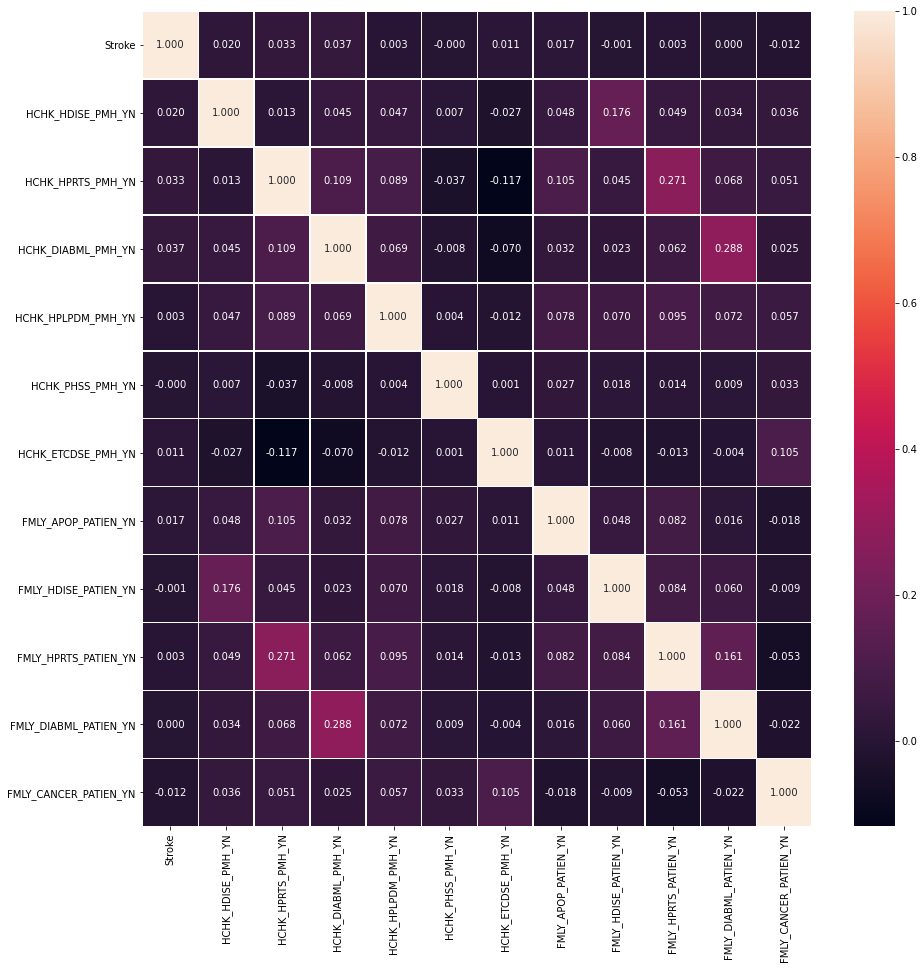

In [24]:
# 본인, 유전 히트맵 확인
x = data_raw_test.loc[:, ['Stroke', 'HCHK_HDISE_PMH_YN','HCHK_HPRTS_PMH_YN','HCHK_DIABML_PMH_YN','HCHK_HPLPDM_PMH_YN','HCHK_PHSS_PMH_YN','HCHK_ETCDSE_PMH_YN','FMLY_APOP_PATIEN_YN','FMLY_HDISE_PATIEN_YN','FMLY_HPRTS_PATIEN_YN','FMLY_DIABML_PATIEN_YN','FMLY_CANCER_PATIEN_YN'
]]
corr = x.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.3f', linewidths=0.5, ax=ax)
'''
HCHK_HPRTS_PHM_YN => FMLY_HPRTS_PARENT_YN => 고혈압
CHK_DIABML_PMH_YN => FMLY_DIABML_PATIEN_YN => 당뇨병
* 유전될 가능성이 다른 것에 비해 크다는 걸 알 수 있음
'''

In [25]:
data_raw_test.loc[:,['HCHK_APOP_PMH_YN','HCHK_DIABML_PMH_YN','HCHK_ETCDSE_PMH_YN','HCHK_HDISE_PMH_YN','HCHK_HPLPDM_PMH_YN','HCHK_HPRTS_PMH_YN','HCHK_PHSS_PMH_YN','FMLY_APOP_PATIEN_YN','FMLY_CANCER_PATIEN_YN','FMLY_DIABML_PATIEN_YN','FMLY_HDISE_PATIEN_YN','FMLY_HPRTS_PATIEN_YN']]

,HCHK_APOP_PMH_YN,HCHK_DIABML_PMH_YN,HCHK_ETCDSE_PMH_YN,HCHK_HDISE_PMH_YN,HCHK_HPLPDM_PMH_YN,HCHK_HPRTS_PMH_YN,HCHK_PHSS_PMH_YN,FMLY_APOP_PATIEN_YN,FMLY_CANCER_PATIEN_YN,FMLY_DIABML_PATIEN_YN,FMLY_HDISE_PATIEN_YN,FMLY_HPRTS_PATIEN_YN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
244166,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
244167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244168,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
244169,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
'''
일반은 0으로 넣어보기로 했다.
'''
data_raw_test['HCHK_APOP_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_DIABML_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_ETCDSE_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_HDISE_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_HPLPDM_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_HPRTS_PMH_YN'].fillna(0, inplace=True)
data_raw_test['HCHK_PHSS_PMH_YN'].fillna(0, inplace=True)
data_raw_test['FMLY_APOP_PATIEN_YN'].fillna(0, inplace=True)
data_raw_test['FMLY_CANCER_PATIEN_YN'].fillna(0, inplace=True)
data_raw_test['FMLY_DIABML_PATIEN_YN'].fillna(0, inplace=True)
data_raw_test['FMLY_HDISE_PATIEN_YN'].fillna(0, inplace=True)
data_raw_test['FMLY_HPRTS_PATIEN_YN'].fillna(0, inplace=True)

In [27]:
data_raw_test.isnull().sum()

PERSON_ID                     0
SEX                           0
AGE                           0
SIDO                          0
IPSN_TYPE_CD                  0
CTRB_PT_TYPE_CD               0
DFAB_GRD_CD                   0
DFAB_PTN_CD                   0
Stroke                        0
AF                            0
CAD                           0
Cancer                        0
DM                            0
HF                            0
HTN                           0
aad                           0
anticoagulant                 0
antiplatelet_agent            0
cardiotonics                  0
statin                        0
HCHK_YEAR                     0
HME_DT                        0
HEIGHT                        0
WEIGHT                        0
WAIST                         0
BP_HIGH                       0
BP_LWST                       0
BLDS                          0
TOT_CHOLE                     0
TRIGLYCERIDE                  0
HDL_CHOLE                     0
LDL_CHOL

In [28]:
data_raw_test['TM1_DRKQTY_RSPS_CD'].fillna(int(data_raw_test['TM1_DRKQTY_RSPS_CD'].mean()), inplace=True)

In [29]:
data_raw_test.isnull().sum()

PERSON_ID                0
SEX                      0
AGE                      0
SIDO                     0
IPSN_TYPE_CD             0
CTRB_PT_TYPE_CD          0
DFAB_GRD_CD              0
DFAB_PTN_CD              0
Stroke                   0
AF                       0
CAD                      0
Cancer                   0
DM                       0
HF                       0
HTN                      0
aad                      0
anticoagulant            0
antiplatelet_agent       0
cardiotonics             0
statin                   0
HCHK_YEAR                0
HME_DT                   0
HEIGHT                   0
WEIGHT                   0
WAIST                    0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
G

In [30]:
# BMI 계산기 만들기
def bim_calc(w, h):
    return w/(h**2)

In [31]:
#data_raw_test['BMI'] = data_raw_test['WEIGHT']/(data_raw_test['HEIGHT']/100)**2

In [32]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243960 entries, 0 to 244170
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              243960 non-null  int64  
 1   SEX                    243960 non-null  int64  
 2   AGE                    243960 non-null  int64  
 3   SIDO                   243960 non-null  int64  
 4   IPSN_TYPE_CD           243960 non-null  int64  
 5   CTRB_PT_TYPE_CD        243960 non-null  int64  
 6   DFAB_GRD_CD            243960 non-null  int64  
 7   DFAB_PTN_CD            243960 non-null  int64  
 8   Stroke                 243960 non-null  float64
 9   AF                     243960 non-null  float64
 10  CAD                    243960 non-null  float64
 11  Cancer                 243960 non-null  float64
 12  DM                     243960 non-null  float64
 13  HF                     243960 non-null  float64
 14  HTN                    243960 non-nu

In [33]:
data_raw_test.drop('AGE_GROUP', axis=1, inplace=True)
data_raw_test.drop('PERSON_ID', axis=1, inplace=True)

In [34]:
data_raw_test['SEX'] = data_raw_test['SEX']%2

In [35]:
data_raw_test.head()

,SEX,AGE,SIDO,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,Stroke,AF,CAD,...,FMLY_CANCER_PATIEN_YN,FMLY_DIABML_PATIEN_YN,FMLY_HDISE_PATIEN_YN,FMLY_HPRTS_PATIEN_YN,SMK_STAT_TYPE_RSPS_CD,DRNK_HABIT_RSPS_CD,TM1_DRKQTY_RSPS_CD,MOV20_WEK_FREQ_ID,MOV30_WEK_FREQ_ID,WLK30_WEK_FREQ_ID
0,0,100,29,6,8,2,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0
1,0,99,41,6,2,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0
2,0,98,47,6,9,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0
3,1,98,44,6,10,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0,98,44,1,1,2,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0


In [36]:
data_raw_test['B_Pressure'] = data_raw_test['BP_HIGH'] - data_raw_test['BP_LWST']

In [37]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243960 entries, 0 to 244170
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SEX                    243960 non-null  int64  
 1   AGE                    243960 non-null  int64  
 2   SIDO                   243960 non-null  int64  
 3   IPSN_TYPE_CD           243960 non-null  int64  
 4   CTRB_PT_TYPE_CD        243960 non-null  int64  
 5   DFAB_GRD_CD            243960 non-null  int64  
 6   DFAB_PTN_CD            243960 non-null  int64  
 7   Stroke                 243960 non-null  float64
 8   AF                     243960 non-null  float64
 9   CAD                    243960 non-null  float64
 10  Cancer                 243960 non-null  float64
 11  DM                     243960 non-null  float64
 12  HF                     243960 non-null  float64
 13  HTN                    243960 non-null  float64
 14  aad                    243960 non-nu

In [185]:
#data_raw_test.isnull().any()
#np.where(np.isnan(x_test))
#np.where(x_test >= np.finfo(np.float64).max)

In [186]:
# 전처리 나중에

In [38]:
data_raw_test.drop('HME_DT', axis=1, inplace=True) #검진일자 삭제

In [39]:
#np.where(data_raw_test >= np.finfo(np.float32).max)
data_raw_test.drop('BMI', axis=1, inplace=True) #검진일자 삭제

KeyError: "['BMI'] not found in axis"

In [40]:
# 본견적인 Train, Test 데이터셋 분할하기
y = x['Stroke']
#ata_raw_test.drop('Stroke', axis=1, inplace=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_raw_test, y, test_size=0.2, random_state=42) # random_state = 난수의 초기값 설정

In [41]:
x_test.head()

,SEX,AGE,SIDO,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,Stroke,AF,CAD,...,FMLY_DIABML_PATIEN_YN,FMLY_HDISE_PATIEN_YN,FMLY_HPRTS_PATIEN_YN,SMK_STAT_TYPE_RSPS_CD,DRNK_HABIT_RSPS_CD,TM1_DRKQTY_RSPS_CD,MOV20_WEK_FREQ_ID,MOV30_WEK_FREQ_ID,WLK30_WEK_FREQ_ID,B_Pressure
238518,1,68,30,6,7,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,58.0
84464,0,76,48,6,5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,45.0
97546,1,74,47,6,10,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,8.0,61.0
6460,1,75,26,6,1,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,3.0,4.0,6.0,1.0,1.0,8.0,64.0
239906,0,68,26,6,5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,4.0,54.0


In [42]:
data_raw_test.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243960 entries, 0 to 244170
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SEX                    243960 non-null  int64  
 1   AGE                    243960 non-null  int64  
 2   SIDO                   243960 non-null  int64  
 3   IPSN_TYPE_CD           243960 non-null  int64  
 4   CTRB_PT_TYPE_CD        243960 non-null  int64  
 5   DFAB_GRD_CD            243960 non-null  int64  
 6   DFAB_PTN_CD            243960 non-null  int64  
 7   Stroke                 243960 non-null  float64
 8   AF                     243960 non-null  float64
 9   CAD                    243960 non-null  float64
 10  Cancer                 243960 non-null  float64
 11  DM                     243960 non-null  float64
 12  HF                     243960 non-null  float64
 13  HTN                    243960 non-null  float64
 14  aad                    243960 non-nu

In [43]:
y = x['Stroke']

In [44]:
data_raw_test.drop('Stroke', axis=1, inplace=True)

In [45]:
# 본견적인 Train, Test 데이터셋 분할하기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_raw_test, y, test_size=0.2, random_state=42) # random_state = 난수의 초기값 설정

In [46]:
# 데이터 정규화

from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
data_raw_test = normalize(data_raw_test)

In [47]:
# 모델 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()


models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [48]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
KNN,0.934354
SVM,0.934354
Random forest,0.934333
Decision tree,0.868134
Naive bayes,0.860059


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

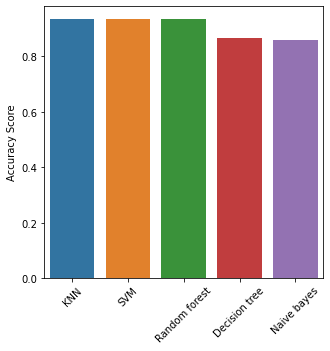

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)

In [57]:
# 랜덤 포레스트의 n_estimators 하이퍼 파라미터를 찾기위해 Grid Search 
# n_estimators = 생성할 tree의 개수
# max_features =

from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}
ran_cv = GridSearchCV(ran, grid, cv=3)
ran_cv.fit(x_train,y_train)

print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 130}
Best score: 0.9326785128709624


In [58]:
# 모델 평가
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

Test accuracy:  0.9342515166420725


In [59]:
y_true = y_test
y_pred = logreg_best.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

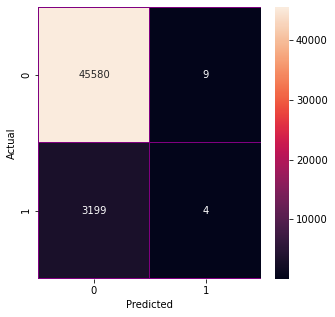

In [61]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
# F1 Score
# >> Precision과 Recall의 조화평균
# 데이터가 불균형할 때

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

,Precision,Recall,F1 Score
Results,0.307692,0.001249,0.002488
